In [1]:
from __future__ import print_function

import tensorflow as tf 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [2]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Model description**

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


**Visualize the model**

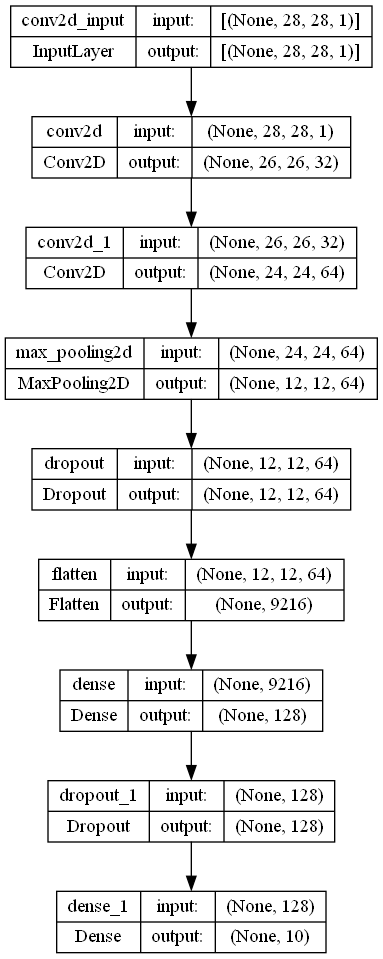

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 55s 115ms/step - loss: 2.2706 - accuracy: 0.1492 - val_loss: 2.2280 - val_accuracy: 0.3053
Epoch 2/12
469/469 [==============================] - 57s 121ms/step - loss: 2.2026 - accuracy: 0.2686 - val_loss: 2.1420 - val_accuracy: 0.5106
Epoch 3/12
469/469 [==============================] - 64s 136ms/step - loss: 2.1118 - accuracy: 0.3900 - val_loss: 2.0253 - val_accuracy: 0.6528
Epoch 4/12
469/469 [==============================] - 64s 137ms/step - loss: 1.9924 - accuracy: 0.4848 - val_loss: 1.8734 - val_accuracy: 0.7198
Epoch 5/12
469/469 [==============================] - 66s 142ms/step - loss: 1.8406 - accuracy: 0.5489 - val_loss: 1.6845 - val_accuracy: 0.7525
Epoch 6/12
469/469 [==============================] - 68s 144ms/step - loss: 1.6669 - accuracy: 0.5905 - val_loss: 1.4732 - val_accuracy: 0.7719
Epoch 7/12
469/469 [==============================] - ETA: 0s - loss: 1.4884 - accuracy: 0.6228

In [8]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6575264930725098
Test accuracy: 0.8446000218391418
